# Human Life Expectancy Prediction

Dataset presents information about life expectancy of citizens by country.
Dataset has (2350 rows and 23 columns.
The objective is to create the best model that would accurately predict life expectancy for each country provided.)

## Pseudocodes
- import the necessary libraries
- import dataset
- check through for abnormalities and handle them all
- check for correlation
- print out your cleaned dataset
- train-test split
- build a machine learning model
- evaluate the performance

In [3]:
#importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
#reading dataset into notebook
df = pd.read_csv(r'C:\Users\pc\Desktop\pythonclass\Aptech\DataAnalytics\DataSets\train.csv')

In [6]:
#reviewing data for basic information
df.shape

(2350, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life_expectancy                  2350 non-null   float64
 5   Adult_Mortality                  2342 non-null   float64
 6   infant_deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage_expenditure           2350 non-null   float64
 9   Hepatitis_B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under_five_deaths   

In [8]:
df.head(2)

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Af04604195,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5


In [9]:
#checking for unique values across each column
#particularly categorical
# df.columns.unique().tolist()

for col in df.columns:
    unique = df[col].unique().tolist()
    print(f'Unique values in {col}: {unique}')

Unique values in ID: ['Af04604195', 'Af04794049', 'Af07527693', 'Af11267444', 'Af12688448', 'Af17808747', 'Af22571865', 'Af34726594', 'Af39961942', 'Af42758956', 'Af53354744', 'Af62594375', 'Af70393151', 'Af79461119', 'Af79974133', 'Al03889716', 'Al07372575', 'Al15013757', 'Al16514527', 'Al17865941', 'Al25400024', 'Al25846524', 'Al29152910', 'Al32870968', 'Al34939157', 'Al39720045', 'Al41233613', 'Al45687587', 'Al45956556', 'Al46999477', 'Al49254651', 'Al64923480', 'Al68690106', 'Al70563449', 'Al78311468', 'Al83079895', 'Al84818908', 'Al90391297', 'Al91109017', 'Al94673969', 'Al95970254', 'An09602408', 'An09744504', 'An11364544', 'An13392616', 'An28982716', 'An41066677', 'An43724175', 'An46527430', 'An47586395', 'An49109506', 'An52015777', 'An52876192', 'An52888198', 'An60492708', 'An60640049', 'An63484305', 'An66163578', 'An71966854', 'An75342916', 'An76418386', 'An80771748', 'An95482872', 'An96463360', 'An96926963', 'An97564512', 'An99054417', 'Ar07283197', 'Ar08274412', 'Ar17980489'

In [10]:
#to check for duplicates
df[df.duplicated()]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling


### Checking for Null Values and Handling Missing Values

In [12]:
#looping through the dataframe to reveal only columns with missing values
for col in df.columns:
    if df[col].isnull().sum().any():
        num = df[col].isnull().sum()
        print(f"'{col}' has {num} missing values")

'Adult_Mortality' has 8 missing values
'Alcohol' has 158 missing values
'Hepatitis_B' has 439 missing values
'BMI' has 27 missing values
'Polio' has 14 missing values
'Total_expenditure' has 185 missing values
'Diphtheria' has 14 missing values
'GDP' has 345 missing values
'Population' has 516 missing values
'thinness_1-19_years' has 27 missing values
'thinness_5-9_years' has 27 missing values
'Income_composition_of_resources' has 131 missing values
'Schooling' has 129 missing values


In [13]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2350.000000,2350.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.573065,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Categorical Variables
- Year
- Country
- Status

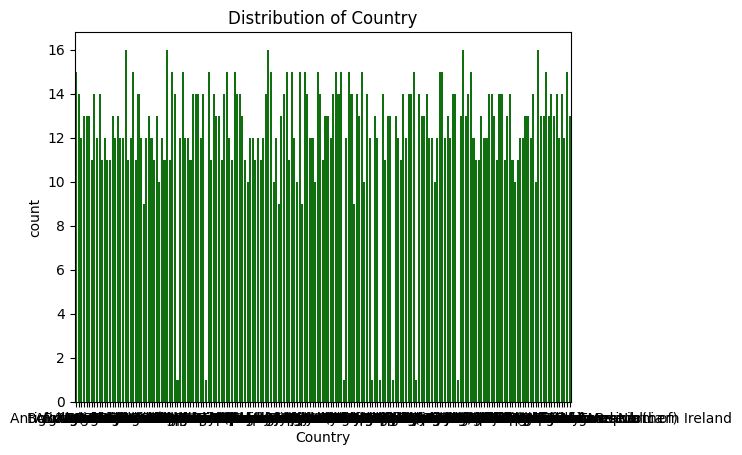

In [15]:
#doing a countplot for some variables
#countries
sb.countplot(x=df['Country'],data=df,color='Green')
plt.title('Distribution of Country')
plt.show()

In [16]:
df.Country.value_counts().count()

191

In [17]:
df.Country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bahamas',
 'Barbados',
 'Benin',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Botswana',
 'Bosnia and Herzegovina',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Burkina Faso',
 'Cabo Verde',
 'Cameroon',
 'Cambodia',
 'Canada',
 'Central African Republic',
 'China',
 'Chile',
 'Chad',
 'Costa Rica',
 'Comoros',
 'Colombia',
 'Congo',
 'Cook Islands',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 "Democratic People's Republic of Korea",
 'Djibouti',
 'Dominican Republic',
 'Dominica',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Gambia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guyana',
 

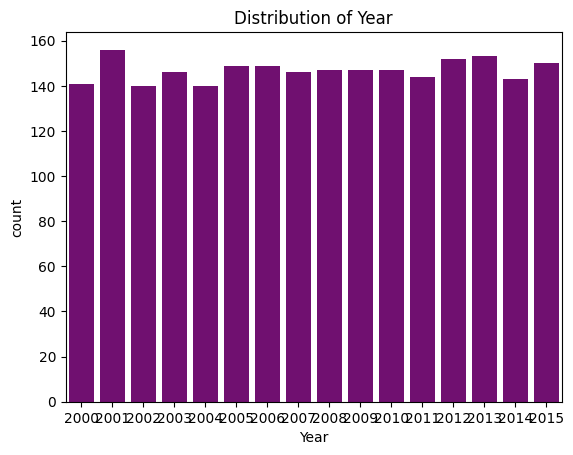

In [18]:
#Year
sb.countplot(x=df['Year'],data=df,color='Purple')
plt.title('Distribution of Year')
plt.show()

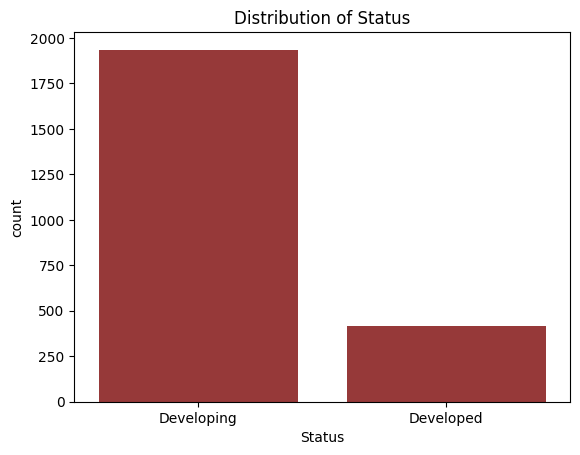

In [19]:
#Status
sb.countplot(x=df['Status'],data=df,color='Brown')
plt.title('Distribution of Status')
plt.show()

In [20]:
#doing a pairplot to visualize all relationship
# sb.pairplot(data=df)

### Numerical Variables
The rest of the column

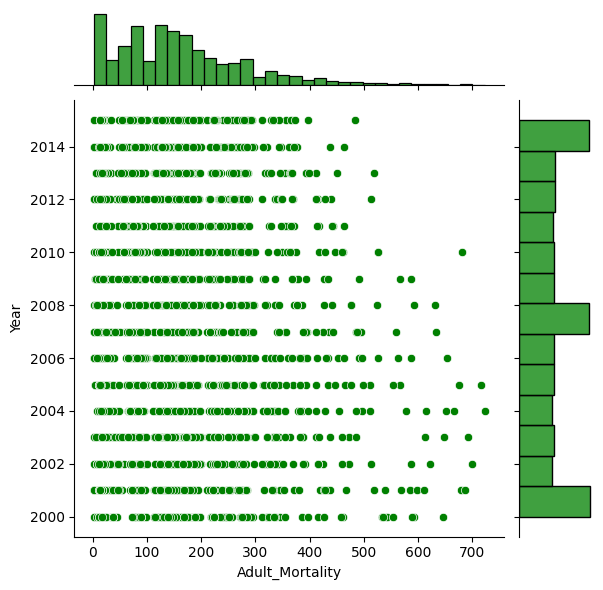

In [360]:
#checking relationship between life_expectancy and other select variables
#Adult mortality
sb.jointplot(y=df.Year,x=df.Adult_Mortality,data=df,color='Green')

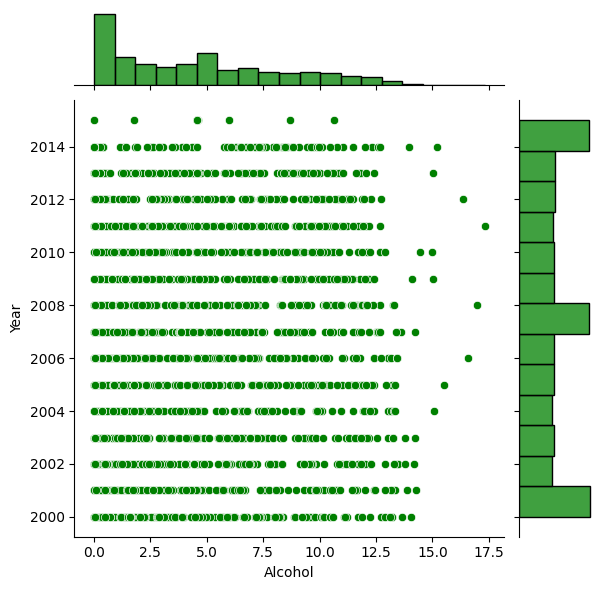

In [362]:
#checking relationship between life_expectancy and other select variables
#Alcohol
sb.jointplot(y=df.Year,x=df.Alcohol,data=df,color='Green')

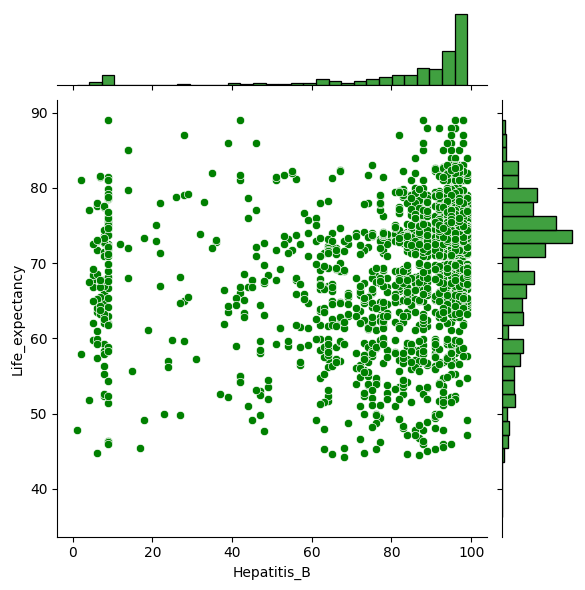

In [24]:
#checking relationship between life_expectancy and other select variables
#Hepatitis B
sb.jointplot(y=df.Life_expectancy,x=df.Hepatitis_B,data=df,color='Green')

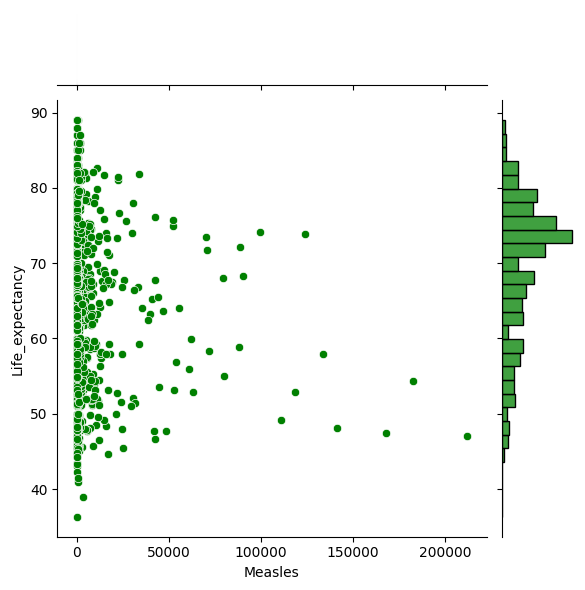

In [25]:
#checking relationship between life_expectancy and other select variables
#Measles
sb.jointplot(y=df.Life_expectancy,x=df.Measles,data=df,color='Green')

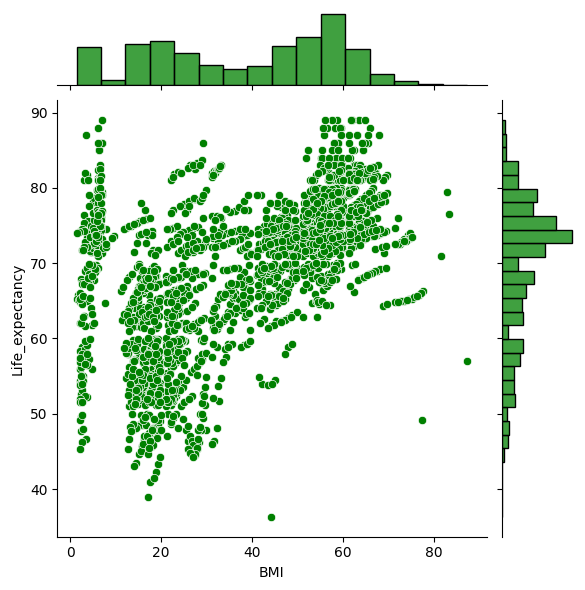

In [26]:
#checking relationship between life_expectancy and other select variables
#BMI
sb.jointplot(y=df.Life_expectancy,x=df.BMI,data=df,color='Green')

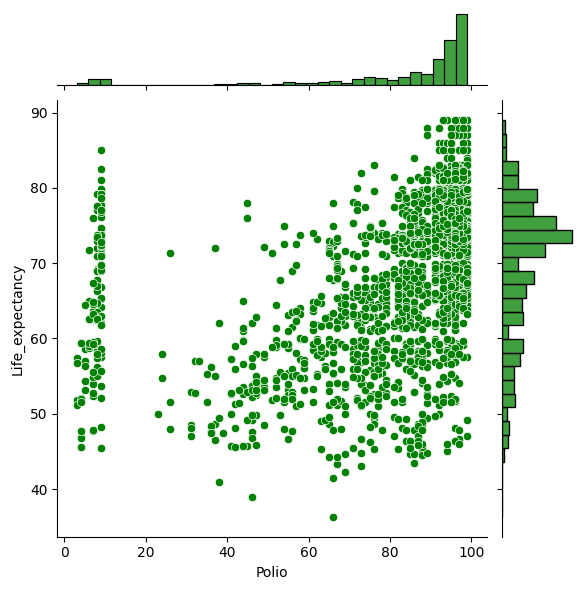

In [27]:
#checking relationship between life_expectancy and other select variables
#Polio
sb.jointplot(y=df.Life_expectancy,x=df.Polio,data=df,color='Green')

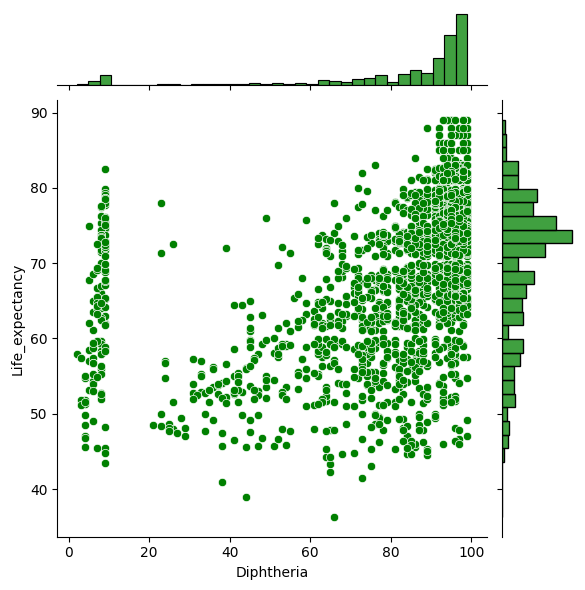

In [28]:
#checking relationship between life_expectancy and other select variables
#Diphtheria
sb.jointplot(y=df.Life_expectancy,x=df.Diphtheria,data=df,color='Green')

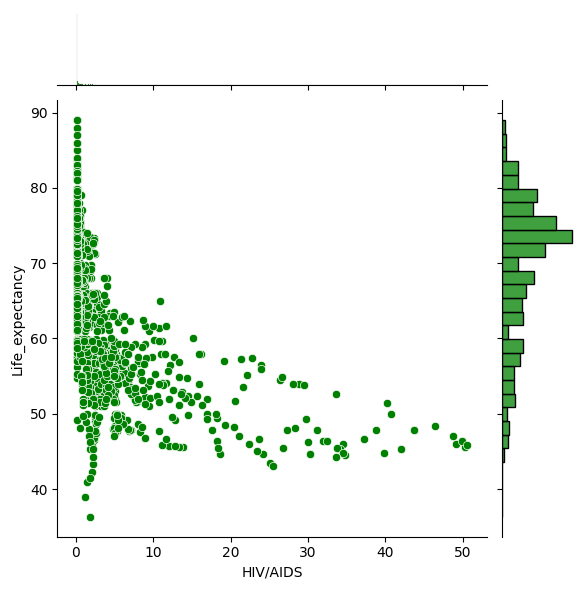

In [29]:
#checking relationship between life_expectancy and other select variables
#HIV/AIDS
sb.jointplot(y=df.Life_expectancy,x=df['HIV/AIDS'],data=df,color='Green')

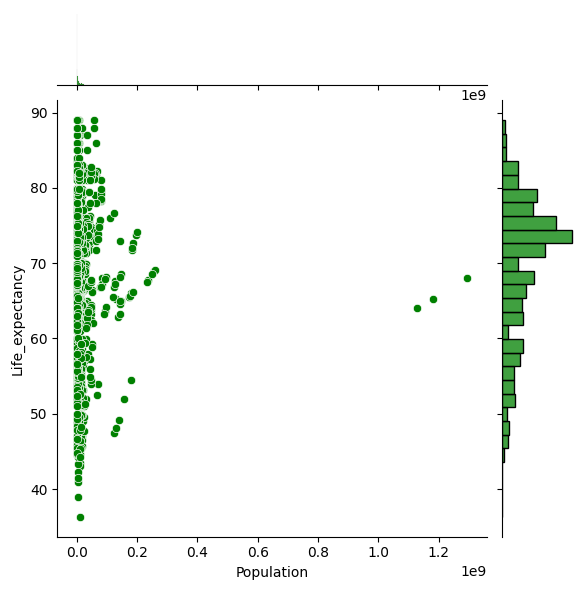

In [30]:
#checking relationship between life_expectancy and other select variables
#Population
sb.jointplot(y=df.Life_expectancy,x=df.Population,data=df,color='Green')

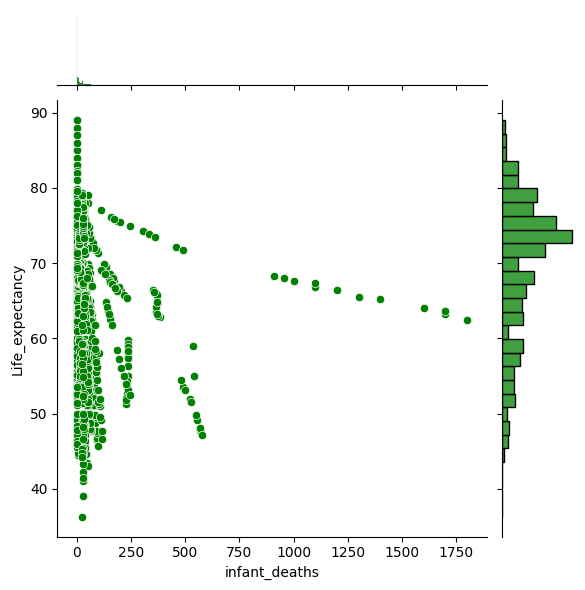

In [31]:
#checking relationship between life_expectancy and other select variables
#Infant deaths
sb.jointplot(y=df.Life_expectancy,x=df.infant_deaths,data=df,color='Green')

In [32]:
# #checking relationship between life_expectancy and other select variables
# relationship = df[['Alcohol','Hepatitis_B','Measles','BMI','Polio','Diphtheria','HIV/AIDS','Population']]
# target = df['Life_expectancy']

# for col in relationship.values:
#     sb.jointplot(x=col,y=target,data=df,color='Green',kind='scatter')
#     plt.title(f'Jointplot for {target} and {col}')
#     plt.show()

#### Filling Missing Values

In [34]:
#looping through the dataframe to reveal only columns with missing values
for col in df.columns:
    if df[col].isnull().sum().any():
        num = df[col].isnull().sum()
        print(f"'{col}' has {num} missing values")

'Adult_Mortality' has 8 missing values
'Alcohol' has 158 missing values
'Hepatitis_B' has 439 missing values
'BMI' has 27 missing values
'Polio' has 14 missing values
'Total_expenditure' has 185 missing values
'Diphtheria' has 14 missing values
'GDP' has 345 missing values
'Population' has 516 missing values
'thinness_1-19_years' has 27 missing values
'thinness_5-9_years' has 27 missing values
'Income_composition_of_resources' has 131 missing values
'Schooling' has 129 missing values


In [35]:
#filling missing values of numerical variables with mean and median
df['Adult_Mortality'] = df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis_B'] = df['Hepatitis_B'].fillna(df['Hepatitis_B'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Total_expenditure'] = df['Total_expenditure'].fillna(df['Total_expenditure'].mean())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df['thinness_1-19_years'] = df['thinness_1-19_years'].fillna(df['thinness_1-19_years'].median())
df['thinness_5-9_years'] = df['thinness_5-9_years'].fillna(df['thinness_5-9_years'].median())
df['Income_composition_of_resources'] = df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [36]:
if df.isnull().sum().any():
    print('Missing values unfilled!')
else:
    print('Missing values filled:)')

Missing values filled:)


In [37]:
# #To display ENTIRE dataset
# pd.options.display.max_rows = 9999
# pd.options.display.max_columns = 100

#### Treating Outliers

##### Upper Outliers

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life_expectancy                  2350 non-null   float64
 5   Adult_Mortality                  2350 non-null   float64
 6   infant_deaths                    2350 non-null   int64  
 7   Alcohol                          2350 non-null   float64
 8   percentage_expenditure           2350 non-null   float64
 9   Hepatitis_B                      2350 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2350 non-null   float64
 12  under_five_deaths   

In [41]:
#percentage_expenditure
uv1 = np.percentile(df['percentage_expenditure'],[99])[0]
#Measles
uv2 = np.percentile(df['Measles'],[99])[0]
#under_five_deaths
uv3 = np.percentile(df['under_five_deaths'],[99])[0]
#HIV
uv4 = np.percentile(df['HIV/AIDS'],[99])[0]
#Population
uv5 = np.percentile(df['Population'],[99])[0]
#thinness_1-19_years
# uv6 = np.percentile(df['thinness_1-19_years'],[99])[0]
# #thinness_5-9_years
# uv7 = np.percentile(df['thinness_5-9_years'],[99])[0]
#GDP
uv8 = np.percentile(df['GDP'],[99])[0]

print(uv1)
print(uv2)
print(uv3)
print(uv4)
print(uv5)
# print(uv6)
# print(uv7)
print(uv8)

10256.542402799998
52546.16999999996
753.1199999999972
30.152999999999928
143672105.92999992
62337.13820199996


In [42]:
#df[df['percentage_expenditure'] > 1.5*uv1]

In [43]:
df[df['Measles'] > 3*uv2]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
581,De69987959,Democratic Republic of the Congo,2005,Developing,54.3,314.0,233,1.43,0.000000,81.141811,...,6.0,3.14,6.0,2.0,7384.623471,1.192254e+07,11.5,11.3,0.631084,12.02814
1495,Ni39089689,Nigeria,2001,Developing,47.4,48.0,574,9.58,15.830985,81.141811,...,36.0,3.25,27.0,5.1,351.799667,1.254634e+08,14.1,14.1,0.000000,8.00000
1510,Ni70528438,Nigeria,2000,Developing,47.1,45.0,576,9.23,22.481776,81.141811,...,31.0,2.84,29.0,4.9,379.119326,1.223529e+06,14.3,14.4,0.000000,7.60000


In [44]:
df.Measles.describe()

count      2350.000000
mean       2318.703404
std       11589.618520
min           0.000000
25%           0.000000
50%          16.000000
75%         356.250000
max      212183.000000
Name: Measles, dtype: float64

In [45]:
df[df['under_five_deaths'] > 3*uv3]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
946,In23258207,India,2002,Developing,63.3,219.0,1700,1.10,17.812056,81.141811,...,58.0,4.40,59.0,0.3,466.284200,18987112.0,27.4,28.4,0.499,8.4
947,In29166267,India,2000,Developing,62.5,224.0,1800,0.93,19.266157,81.141811,...,57.0,4.26,58.0,0.3,438.864634,1535912.0,27.7,28.6,0.489,8.3


In [46]:
#df[df['HIV/AIDS'] > 3*uv4]

In [47]:
df['under_five_deaths'].describe()

count    2350.000000
mean       40.094468
std       152.939537
min         0.000000
25%         0.000000
50%         4.000000
75%        26.000000
max      2500.000000
Name: under_five_deaths, dtype: float64

In [48]:
df[df['Population'] > 3*uv5]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
942,In04324722,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
954,In46387437,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
956,In66506394,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9


In [49]:
df.Population.describe()

count    2.350000e+03
mean     1.192254e+07
std      4.841177e+07
min      3.400000e+01
25%      3.949550e+05
50%      3.746860e+06
75%      1.192254e+07
max      1.293859e+09
Name: Population, dtype: float64

In [50]:
df[df['GDP'] > uv8]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
107,Au63114483,Australia,2012,Developed,82.3,61.0,1,10.030000,11714.998580,91.000000,...,92.0,9.360000,92.0,0.1,67677.63477,2.272825e+07,0.6,0.6,0.930,20.1
116,Au99198627,Australia,2013,Developed,82.5,61.0,1,9.870000,11734.853810,91.000000,...,91.0,9.360000,91.0,0.1,67792.33860,2.311735e+07,0.6,0.6,0.933,20.3
553,De04061937,Denmark,2014,Developed,84.0,73.0,0,9.640000,10468.762920,81.141811,...,94.0,1.800000,94.0,0.1,62425.53920,5.643475e+06,1.1,0.9,0.926,19.2
554,De08100673,Denmark,2008,Developed,78.8,88.0,0,10.700000,10761.182090,81.141811,...,88.0,1.180000,88.0,0.1,64322.66640,5.493621e+06,1.1,0.9,0.906,16.8
926,Ic07919742,Iceland,2007,Developed,81.3,59.0,0,7.530000,12042.973660,81.141811,...,97.0,8.750000,97.0,0.1,68348.31817,3.115660e+05,0.9,0.9,0.887,18.2
1218,Lu43947910,Luxembourg,2004,Developed,78.7,92.0,0,12.420000,12372.051880,94.000000,...,99.0,8.200000,99.0,0.1,75716.35180,4.589500e+04,1.0,0.9,0.867,13.5
1219,Lu64825564,Luxembourg,2008,Developed,80.0,8.0,0,11.530000,18961.348600,94.000000,...,96.0,7.340000,99.0,0.1,114293.84330,4.886500e+04,0.9,0.9,0.887,13.5
1222,Lu77336160,Luxembourg,2013,Developed,81.4,68.0,0,11.020000,15515.752340,94.000000,...,99.0,7.100000,99.0,0.1,113751.85000,5.433600e+04,0.9,0.9,0.892,13.9
1223,Lu83817666,Luxembourg,2011,Developed,88.0,72.0,0,11.500000,17028.527980,95.000000,...,96.0,7.340000,99.0,0.1,115761.57700,5.183470e+05,0.9,0.9,0.894,13.9
1518,No07320260,Norway,2006,Developed,84.0,7.0,0,6.470000,12829.254080,81.141811,...,94.0,8.430000,94.0,0.1,74114.69715,4.666770e+05,0.8,0.7,0.931,17.5


In [51]:
#df[df['thinness_1-19_years'] > 3*uv6]

In [52]:
#df[df['thinness_5-9_years'] > 3*uv7]

In [53]:
#setting new outliers values for Measles and Under five death
df.loc[df['Measles'] > 3*uv2, 'Measles'] = 3*uv2
df.loc[df['under_five_deaths'] > 3*uv3, 'under_five_deaths'] = 3*uv3
df.loc[df['Population'] > 3*uv5, 'Population'] = 3*uv5
df.loc[df['GDP'] > uv8, 'GDP'] = uv8

C:\Users\pc\AppData\Local\Temp\ipykernel_13848\2745077237.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '157638.5099999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Measles'] > 3*uv2, 'Measles'] = 3*uv2
C:\Users\pc\AppData\Local\Temp\ipykernel_13848\2745077237.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2259.3599999999915' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['under_five_deaths'] > 3*uv3, 'under_five_deaths'] = 3*uv3


In [54]:
df.Measles.describe()

count      2350.000000
mean       2280.465332
std       10993.565012
min           0.000000
25%           0.000000
50%          16.000000
75%         356.250000
max      157638.510000
Name: Measles, dtype: float64

In [55]:
df['under_five_deaths'].describe()

count    2350.000000
mean       39.974774
std       151.108049
min         0.000000
25%         0.000000
50%         4.000000
75%        26.000000
max      2259.360000
Name: under_five_deaths, dtype: float64

In [56]:
df['Population'].describe()

count    2.350000e+03
mean     1.094100e+07
std      2.753929e+07
min      3.400000e+01
25%      3.949550e+05
50%      3.746860e+06
75%      1.192254e+07
max      4.310163e+08
Name: Population, dtype: float64

In [57]:
df['GDP'].describe()

count     2350.000000
mean      7194.545585
std      12037.828898
min          1.681350
25%        564.088121
50%       3054.363603
75%       7384.623471
max      62337.138202
Name: GDP, dtype: float64

##### Lower outliers

In [59]:
#Adult_Mortality
lv1 = np.percentile(df['Adult_Mortality'],[1])[0]
#infant_deaths
# lv2 = np.percentile(df['infant_deaths'],[1])[0]
# #Alcohol
# lv3 = np.percentile(df['Alcohol'],[1])[0]
# #percentage_expenditure
# lv4 = np.percentile(df['percentage_expenditure'],[1])[0]
#Hepatitis_B
lv5 = np.percentile(df['Hepatitis_B'],[1])[0]
# #Measles
# lv6 = np.percentile(df['Measles'],[1])[0]
#BMI
lv7 = np.percentile(df['BMI'],[1])[0]
# #under_five_deaths
# lv8 = np.percentile(df['under_five_deaths'],[1])[0]
#Polio
lv9 = np.percentile(df['Polio'],[1])[0]
#Diphtheria
lv10 = np.percentile(df['Diphtheria'],[1])[0]
#Schooling
lv11 = np.percentile(df['Schooling'],[1])[0]
#Population
lv12 = np.percentile(df['Population'],[1])[0]

print(lv1)
# print(lv2)
# print(lv3)
# print(lv4)
print(lv5)
# print(lv6)
print(lv7)
# print(lv8)
print(lv9)
print(lv10)
print(lv11)
print(lv12)

4.0
6.0
2.3
6.0
6.0
2.9
1196.3700000000001


In [60]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2280.465332,38.556780,39.974774,82.693921,5.936185,82.376712,1.787064,7194.545585,1.094100e+07,4.782979,4.820596,0.631084,12.028140
std,4.611986,9.573065,125.060094,111.836006,3.896770,1952.616462,22.381998,10993.565012,19.958157,151.108049,23.293600,2.408747,23.722431,5.266324,12037.828898,2.753929e+07,4.381124,4.460068,0.201702,3.253567
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,1.100000,5.491010,81.141811,0.000000,19.600000,0.000000,78.000000,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000
50%,2008.000000,72.200000,144.000000,3.000000,4.160000,65.611455,87.000000,16.000000,43.500000,4.000000,93.000000,5.936185,93.000000,0.100000,3054.363603,3.746860e+06,3.300000,3.300000,0.668000,12.200000
75%,2012.000000,75.700000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,97.000000,7.340000,97.000000,0.800000,7384.623471,1.192254e+07,7.075000,7.100000,0.773000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,157638.510000,87.300000,2259.360000,99.000000,17.240000,99.000000,50.600000,62337.138202,4.310163e+08,27.700000,28.600000,0.948000,20.700000


In [61]:
df[df['Adult_Mortality'] < 0.5 * lv1]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
20,Al25400024,Albania,2008,Developing,75.3,1.0,1,5.610000,36.622068,99.000000,...,99.0,5.870000,99.0,0.1,437.539647,2.947314e+06,1.6,1.6,0.713,12.0
161,Ba68694092,Barbados,2014,Developing,75.4,1.0,0,8.820000,294.905658,94.000000,...,95.0,7.470000,94.0,0.1,15359.669710,1.192254e+07,3.8,3.7,0.793,15.3
243,Bo17437891,Bosnia and Herzegovina,2006,Developing,75.7,1.0,0,4.820000,38.254141,9.000000,...,91.0,8.280000,87.0,0.1,344.321698,3.779468e+06,2.9,2.8,0.697,12.7
297,Br70169969,Brunei Darussalam,2007,Developing,76.0,1.0,0,0.850000,2048.557422,97.000000,...,95.0,2.320000,99.0,0.1,32672.367170,1.192254e+07,6.2,5.7,0.840,14.3
400,Ch05916768,Chile,2003,Developing,77.9,1.0,2,6.370000,584.099343,81.141811,...,96.0,7.340000,96.0,0.1,4787.699532,1.579954e+07,1.0,1.0,0.775,14.0
432,Co01664285,Costa Rica,2001,Developing,77.5,1.0,1,4.290000,868.371359,8.000000,...,92.0,7.250000,91.0,0.1,3981.528470,3.996798e+06,2.3,2.2,0.708,11.7
447,Co36291150,Costa Rica,2003,Developing,78.0,1.0,1,4.040000,1070.268999,86.000000,...,88.0,8.450000,88.0,0.1,4167.714170,4.125971e+06,2.2,2.1,0.715,12.1
714,Fi08258405,Finland,2001,Developing,78.0,1.0,0,8.940000,2775.335440,81.141811,...,95.0,7.430000,98.0,0.1,24913.244520,5.188800e+04,0.9,0.8,0.856,17.7
1153,Le08638748,Lebanon,2006,Developing,74.1,1.0,1,1.820000,534.579570,78.000000,...,75.0,8.830000,78.0,0.1,5372.658990,4.573500e+04,4.7,4.6,0.733,13.2
1771,Sa69482021,Saudi Arabia,2006,Developing,73.2,1.0,9,0.080000,1395.454965,96.000000,...,96.0,3.550000,96.0,0.1,15334.669940,1.192254e+07,7.2,7.3,0.767,12.5


In [62]:
# df[df['infant_deaths'] < 0.3 * lv2]

In [63]:
df[df['BMI'] < lv7]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
138,Ba12041387,Bangladesh,2001,Developing,65.8,168.0,219,0.01,3.395070,81.141811,...,85.0,2.470000,85.0,0.1,42.598115,1.341716e+06,2.7,21.3,0.468000,7.50000
175,Ba99699044,Bangladesh,2000,Developing,65.3,173.0,231,0.01,3.696331,81.141811,...,83.0,2.330000,82.0,0.1,45.633710,1.315812e+08,2.9,21.5,0.459000,7.30000
388,Ce05800513,Central African Republic,2010,Developing,49.2,446.0,17,1.67,43.483592,45.000000,...,46.0,3.900000,45.0,6.6,446.443449,4.448525e+06,9.0,8.9,0.352000,6.60000
435,Co10191946,Comoros,2007,Developing,66.0,259.0,2,0.16,9.087638,75.000000,...,75.0,4.930000,75.0,0.1,72.759313,6.416200e+04,7.3,7.2,0.459000,10.00000
587,De84295160,Democratic Republic of the Congo,2012,Developing,58.3,277.0,239,0.01,0.000000,75.000000,...,76.0,3.770000,75.0,1.5,7384.623471,1.192254e+07,1.0,9.8,0.631084,12.02814
666,Eq40344121,Equatorial Guinea,2005,Developing,54.4,337.0,3,7.19,12.066167,81.141811,...,5.0,1.630000,39.0,4.9,185.633340,7.573170e+05,9.8,9.8,0.563000,8.70000
809,Gh23212891,Ghana,2001,Developing,57.4,39.0,42,1.49,25.559813,81.141811,...,81.0,3.560000,79.0,3.5,273.659667,1.942165e+06,9.0,9.0,0.485000,8.00000
882,Gu95867276,Guinea-Bissau,2005,Developing,53.9,37.0,5,3.10,22.097580,81.141811,...,73.0,5.720000,68.0,5.4,424.953459,1.388380e+05,9.2,9.0,0.000000,8.00000
1079,Ke32074194,Kenya,2012,Developing,62.1,263.0,59,1.81,154.226970,94.000000,...,94.0,5.490000,94.0,3.0,1155.258200,4.364663e+07,8.0,7.8,0.536000,11.10000
1136,La31538951,Lao People's Democratic Republic,2013,Developing,64.9,23.0,9,0.01,0.000000,87.000000,...,86.0,2.000000,87.0,0.3,7384.623471,1.192254e+07,9.0,9.1,0.563000,10.40000


In [64]:
df[df['Hepatitis_B'] < lv5]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
122,Az35838222,Azerbaijan,2002,Developing,67.8,146.0,7,0.55,39.332537,5.0,...,8.0,4.47,76.0,0.1,763.738580,8.171950e+05,3.1,3.1,0.651000,10.60000
125,Az77165292,Azerbaijan,2004,Developing,68.4,154.0,6,0.62,8.596805,5.0,...,78.0,7.92,77.0,0.1,145.216300,8.365000e+03,3.0,3.0,0.668000,11.00000
160,Ba66600216,Bangladesh,2003,Developing,66.8,161.0,196,0.01,35.484590,5.0,...,9.0,2.51,87.0,0.1,432.738897,1.391910e+05,2.3,2.9,0.484000,7.90000
367,Ca70659512,Cabo Verde,2002,Developing,77.0,148.0,0,3.82,155.207267,4.0,...,92.0,5.17,91.0,0.8,1373.515636,4.521600e+04,9.2,9.1,0.569000,11.30000
415,Ch43754997,Chad,2012,Developing,51.8,367.0,46,0.62,57.824271,4.0,...,51.0,3.00,4.0,3.6,973.472574,1.275135e+06,9.0,8.9,0.381000,7.30000
545,Cô47750568,Côte d'Ivoire,2001,Developing,47.8,467.0,65,3.15,0.000000,1.0,...,7.0,4.85,66.0,7.0,7384.623471,1.192254e+07,7.9,7.9,0.631084,12.02814
660,Eq01510014,Equatorial Guinea,2014,Developing,57.9,32.0,3,0.01,13.404774,2.0,...,24.0,3.80,2.0,4.4,192.597330,1.129424e+06,8.5,8.4,0.582000,9.20000
1095,Ki54526341,Kiribati,2005,Developing,64.9,213.0,0,0.60,111.739213,5.0,...,74.0,1.60,79.0,0.1,1214.556667,9.232500e+04,0.2,0.2,0.000000,12.20000
1129,La08755105,Lao People's Democratic Republic,2003,Developing,59.8,259.0,12,3.41,0.000000,5.0,...,52.0,4.91,49.0,0.1,7384.623471,1.192254e+07,1.2,1.3,0.477000,8.30000
1144,La75085645,Lao People's Democratic Republic,2007,Developing,62.1,234.0,11,5.00,0.000000,5.0,...,46.0,4.14,5.0,0.2,7384.623471,1.192254e+07,9.7,9.8,0.509000,9.00000


In [65]:
df[df['Polio'] < lv9]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
6,Af22571865,Afghanistan,2004,Developing,57.0,293.0,87,0.020000,15.296066,67.000000,...,5.0,8.790000,5.0,0.1,219.141353,2.411898e+07,19.5,19.7,0.381000,6.80000
44,An13392616,Angola,2004,Developing,47.1,386.0,94,3.530000,8.866777,81.141811,...,4.0,4.710000,4.0,2.5,141.868440,1.886572e+07,1.2,1.1,0.415000,6.40000
51,An52015777,Angola,2003,Developing,46.8,388.0,95,3.490000,35.933491,81.141811,...,4.0,4.410000,4.0,2.4,779.468356,1.823369e+06,1.4,1.3,0.406000,5.90000
389,Ce07592508,Central African Republic,2001,Developing,45.6,54.0,17,1.520000,33.653157,81.141811,...,4.0,3.950000,4.0,13.9,243.158649,3.832230e+05,1.4,1.4,0.314000,5.30000
479,Co85008314,Congo,2003,Developing,53.2,417.0,9,2.450000,0.000000,81.141811,...,5.0,2.610000,5.0,6.8,7384.623471,1.192254e+07,9.1,8.8,0.492000,9.40000
570,De47690450,Democratic Republic of the Congo,2002,Developing,52.1,341.0,229,1.850000,0.000000,81.141811,...,4.0,2.590000,38.0,2.4,7384.623471,1.192254e+07,12.1,11.9,0.631084,12.02814
591,De95634584,Democratic Republic of the Congo,2001,Developing,51.8,34.0,227,1.900000,0.000000,81.141811,...,3.0,2.670000,3.0,2.4,7384.623471,1.192254e+07,12.2,12.1,0.631084,12.02814
662,Eq20935760,Equatorial Guinea,2013,Developing,57.4,327.0,3,10.720000,156.390769,81.141811,...,3.0,3.730000,3.0,5.7,2246.993800,1.837460e+05,8.6,8.6,0.586000,9.20000
664,Eq34320039,Equatorial Guinea,2012,Developing,56.7,337.0,3,11.890000,1500.412635,81.141811,...,3.0,4.000000,24.0,8.2,21557.652800,1.385930e+05,8.7,8.7,0.583000,9.20000
666,Eq40344121,Equatorial Guinea,2005,Developing,54.4,337.0,3,7.190000,12.066167,81.141811,...,5.0,1.630000,39.0,4.9,185.633340,7.573170e+05,9.8,9.8,0.563000,8.70000


In [66]:
df[df['Diphtheria'] < 0.8* lv10]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
44,An13392616,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,81.141811,...,4.0,4.710000,4.0,2.5,141.868440,1.886572e+07,1.2,1.1,0.415000,6.40000
51,An52015777,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,81.141811,...,4.0,4.410000,4.0,2.4,779.468356,1.823369e+06,1.4,1.3,0.406000,5.90000
389,Ce07592508,Central African Republic,2001,Developing,45.6,54.0,17,1.52,33.653157,81.141811,...,4.0,3.950000,4.0,13.9,243.158649,3.832230e+05,1.4,1.4,0.314000,5.30000
406,Ch26230203,Chad,2006,Developing,48.5,414.0,45,0.41,62.672260,81.141811,...,49.0,3.320000,4.0,5.1,712.184769,1.421597e+06,1.3,1.2,0.303000,5.50000
415,Ch43754997,Chad,2012,Developing,51.8,367.0,46,0.62,57.824271,4.000000,...,51.0,3.000000,4.0,3.6,973.472574,1.275135e+06,9.0,8.9,0.381000,7.30000
551,De02679262,Democratic Republic of the Congo,2000,Developing,51.3,346.0,226,1.98,0.000000,81.141811,...,42.0,1.450000,4.0,2.5,7384.623471,1.192254e+07,12.4,12.3,0.631084,12.02814
591,De95634584,Democratic Republic of the Congo,2001,Developing,51.8,34.0,227,1.90,0.000000,81.141811,...,3.0,2.670000,3.0,2.4,7384.623471,1.192254e+07,12.2,12.1,0.631084,12.02814
660,Eq01510014,Equatorial Guinea,2014,Developing,57.9,32.0,3,0.01,13.404774,2.000000,...,24.0,3.800000,2.0,4.4,192.597330,1.129424e+06,8.5,8.4,0.582000,9.20000
662,Eq20935760,Equatorial Guinea,2013,Developing,57.4,327.0,3,10.72,156.390769,81.141811,...,3.0,3.730000,3.0,5.7,2246.993800,1.837460e+05,8.6,8.6,0.586000,9.20000
669,Eq75041061,Equatorial Guinea,2006,Developing,54.8,337.0,3,7.28,827.597933,81.141811,...,52.0,2.130000,4.0,5.3,12732.275900,7.922170e+05,9.7,9.6,0.569000,9.00000


In [67]:
df[df['Schooling'] < lv11]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
47,An43724175,Antigua and Barbuda,2004,Developing,74.4,149.000000,0,7.280000,22.862952,97.000000,...,97.000000,4.210000,97.000000,0.1,1352.837400,1.192254e+07,3.5,3.4,0.000000,0.0
48,An46527430,Antigua and Barbuda,2003,Developing,74.2,151.000000,0,7.160000,1158.065259,99.000000,...,99.000000,4.530000,99.000000,0.1,9739.825560,1.192254e+07,3.5,3.5,0.000000,0.0
56,An63484305,Antigua and Barbuda,2000,Developing,73.6,156.000000,0,7.270000,1127.743470,81.141811,...,96.000000,4.130000,95.000000,0.1,9875.161736,1.192254e+07,3.7,3.6,0.000000,0.0
60,An76418386,Antigua and Barbuda,2001,Developing,73.8,154.000000,0,7.510000,163.767698,96.000000,...,99.000000,4.480000,97.000000,0.1,9358.154162,1.192254e+07,3.6,3.5,0.000000,0.0
61,An80771748,Antigua and Barbuda,2002,Developing,74.0,153.000000,0,7.210000,927.407585,99.000000,...,93.000000,4.410000,98.000000,0.1,9386.716452,1.192254e+07,3.6,3.5,0.000000,0.0
62,An95482872,Antigua and Barbuda,2005,Developing,74.6,147.000000,0,8.150000,1455.608186,99.000000,...,98.000000,4.410000,99.000000,0.1,11371.938950,1.192254e+07,3.5,3.4,0.000000,0.0
240,Bo13050330,Bosnia and Herzegovina,2000,Developing,74.6,116.000000,0,3.640000,165.616864,81.141811,...,87.000000,7.900000,85.000000,0.1,1461.755200,3.766760e+05,3.3,3.2,0.000000,0.0
668,Eq61964869,Equatorial Guinea,2000,Developing,52.7,336.000000,3,4.460000,14.954513,81.141811,...,41.000000,2.730000,34.000000,1.9,172.684910,6.143230e+05,1.7,1.6,0.000000,0.0
1234,Ma08208275,Marshall Islands,2013,Developing,71.0,165.824082,0,0.010000,871.878317,8.000000,...,79.000000,17.240000,79.000000,0.1,3617.752354,1.192254e+07,0.1,0.1,0.631084,0.0
1362,Mi86139363,Micronesia (Federated States of),2000,Developing,67.0,185.000000,0,2.230000,0.000000,87.000000,...,85.000000,7.880000,85.000000,0.1,7384.623471,1.192254e+07,0.3,0.3,0.000000,0.0


In [68]:
df[df['Population'] < 0.3*lv12]

,ID,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
791,Ge62222400,Georgia,2008,Developing,73.9,128.000000,1,7.170000,151.762567,89.000000,...,9.0,8.99,92.0,0.1,3174.949100,43.0,2.6,2.8,0.735,13.1
922,Hu77458495,Hungary,2010,Developed,74.5,156.000000,0,10.780000,19.220240,81.141811,...,99.0,7.85,99.0,0.1,1325.533790,123.0,1.8,1.8,0.817,15.3
1277,Ma47372236,Maldives,2001,Developing,78.0,129.000000,0,1.980000,41.306888,98.000000,...,97.0,5.84,98.0,0.1,298.675980,292.0,14.7,14.8,0.587,11.8
1286,Ma55981378,Maldives,2000,Developing,69.6,139.000000,0,1.830000,300.162103,96.000000,...,98.0,8.00,98.0,0.1,2182.997110,286.0,14.8,14.8,0.577,11.3
1304,Ma72481085,Maldives,2014,Developing,78.2,62.000000,0,0.010000,2051.748615,99.000000,...,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
1322,Ma87493489,Maldives,2003,Developing,72.7,112.000000,0,1.750000,491.497891,98.000000,...,98.0,5.90,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8
1328,Ma92969489,Maldives,2005,Developing,74.3,93.000000,0,1.470000,620.951891,98.000000,...,98.0,9.52,98.0,0.1,3488.493769,321.0,14.4,14.5,0.625,12.1
1590,Pa79136853,Palau,2013,Developing,76.5,165.824082,0,4.593271,344.690631,99.000000,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2089,To04339111,Tonga,2004,Developing,72.2,151.000000,0,1.800000,423.295351,9.000000,...,91.0,4.87,9.0,0.1,2284.378580,146.0,0.1,0.1,0.693,14.6
2096,To36195428,Tonga,2008,Developing,72.6,145.000000,0,1.100000,569.625504,84.000000,...,88.0,5.13,86.0,0.1,3392.647430,135.0,0.1,0.1,0.698,14.5


In [69]:
#setting new outliers values for variables with low values
df.loc[df['Adult_Mortality'] < 0.5 * lv1, 'Adult_Mortality'] = 0.5 * lv1
df.loc[df['Hepatitis_B'] < lv5, 'Hepatitis_B'] = lv5
df.loc[df['Polio'] < lv9, 'Polio'] = lv9
df.loc[df['BMI'] < lv7, 'BMI'] = lv7
df.loc[df['Diphtheria'] < 0.8 * lv10, 'Diphtheria'] = 0.8 * lv10
df.loc[df['Schooling'] < lv11, 'Schooling'] = lv11
df.loc[df['Population'] < 0.3 * lv12, 'Population'] = 0.3 * lv12

In [70]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000
mean,2007.537447,69.275404,165.828763,28.793191,4.593271,720.521353,81.153300,2280.465332,38.559078,39.974774,82.708389,5.936185,82.383606,1.787064,7194.545585,1.094100e+07,4.782979,4.820596,0.631084,12.055332
std,4.611986,9.573065,125.053940,111.836006,3.896770,1952.616462,22.342639,10993.565012,19.953953,151.108049,23.245213,2.408747,23.699651,5.266324,12037.828898,2.753929e+07,4.381124,4.460068,0.201702,3.163790
min,2000.000000,36.300000,2.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.300000,0.000000,6.000000,0.650000,4.800000,0.100000,1.681350,3.589110e+02,0.100000,0.100000,0.000000,2.900000
25%,2004.000000,63.300000,74.000000,0.000000,1.100000,5.491010,81.141811,0.000000,19.600000,0.000000,78.000000,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000
50%,2008.000000,72.200000,144.000000,3.000000,4.160000,65.611455,87.000000,16.000000,43.500000,4.000000,93.000000,5.936185,93.000000,0.100000,3054.363603,3.746860e+06,3.300000,3.300000,0.668000,12.200000
75%,2012.000000,75.700000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,97.000000,7.340000,97.000000,0.800000,7384.623471,1.192254e+07,7.075000,7.100000,0.773000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,157638.510000,87.300000,2259.360000,99.000000,17.240000,99.000000,50.600000,62337.138202,4.310163e+08,27.700000,28.600000,0.948000,20.700000


### Handling Skewness

In [72]:
num_col = df.select_dtypes(include=['float64','int64'])

#checking for skewed columns
skew_col = num_col.skew(axis=0,skipna=True)
for col in skew_col.index:
    if skew_col[col] < -0.5 or skew_col[col] > 0.5:
        print(f'{col} has skewness of {skew_col[col]}')

Life_expectancy has skewness of -0.6618799474369444
Adult_Mortality has skewness of 1.2186383571720276
infant_deaths has skewness of 9.925276935031041
Alcohol has skewness of 0.61645823425372
percentage_expenditure has skewness of 4.749119081910268
Hepatitis_B has skewness of -2.162026048904302
Measles has skewness of 9.06149951419901
under_five_deaths has skewness of 9.388411398849446
Polio has skewness of -2.1081141897827798
Total_expenditure has skewness of 0.6529568900702688
Diphtheria has skewness of -2.084474173056117
HIV/AIDS has skewness of 5.356099424662294
GDP has skewness of 2.886547767115968
Population has skewness of 7.96325743298255
thinness_1-19_years has skewness of 1.7337202248743195
thinness_5-9_years has skewness of 1.7875437367247589
Income_composition_of_resources has skewness of -1.1818259601899026


In [73]:
# df['infant_deaths'] = np.log(df['infant_deaths'])
# df.percentage_expenditure = np.log(df.percentage_expenditure)
# df['Measles'] = np.log(df['Measles'])
# df['under_five_deaths'] = np.log(df['under_five_deaths'])
# df['HIV/AIDS'] = np.log(df['HIV/AIDS'])
# df['Population'] = np.log(df['Population'])

# from scipy.stats import boxcox

In [74]:
df.Measles = np.log(1+df.Measles)
df.Measles.skew()
df.Population = np.sqrt(df.Population)
df.Population.skew()
df['HIV/AIDS'] = np.sqrt(df['HIV/AIDS'])
df['HIV/AIDS'].skew()
# df.dying_children = np.sqrt(df.dying_children)
# df.dying_children.skew()
# df.Gross = np.sqrt(df.Gross)
# df.Gross.skew()

2.887479039297919

#### Dropping Non-Useful Variables
- Population
- Thinness_5-9_

In [76]:
df.drop(['thinness_5-9_years','ID'],axis=1,inplace=True)
df.drop(['thinness_1-19_years'],axis=1,inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2350 non-null   object 
 1   Year                             2350 non-null   int64  
 2   Status                           2350 non-null   object 
 3   Life_expectancy                  2350 non-null   float64
 4   Adult_Mortality                  2350 non-null   float64
 5   infant_deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage_expenditure           2350 non-null   float64
 8   Hepatitis_B                      2350 non-null   float64
 9   Measles                          2350 non-null   float64
 10  BMI                              2350 non-null   float64
 11  under_five_deaths                2350 non-null   float64
 12  Polio               

#### Encoding Numerical Data
- Year - label encoder
- Status - ordinal encoder

In [79]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#ordinal encoding
# Manually specify the order mapping
order = [['Developing','Developed']]
# Create and fit the OrdinalEncoder with the custom order mapping
encode = OrdinalEncoder(categories=order)
df['Status_'] = encode.fit_transform(df[['Status']])

#label encoding
encoder = LabelEncoder()
df['Country_'] = encoder.fit_transform(df['Country'])

In [80]:
df.head(1)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_,Country_
0,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,6.066108,...,62.0,8.13,64.0,0.316228,631.744976,5633.088673,0.47,9.9,0.0,0


In [81]:
df.drop(['Country','Status'],axis=1,inplace=True)

In [82]:
df.head(1)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,Status_,Country_
0,2013,59.9,268.0,66,0.01,73.219243,64.0,6.066108,18.1,89.0,62.0,8.13,64.0,0.316228,631.744976,5633.088673,0.47,9.9,0.0,0


#### Doing Correlation

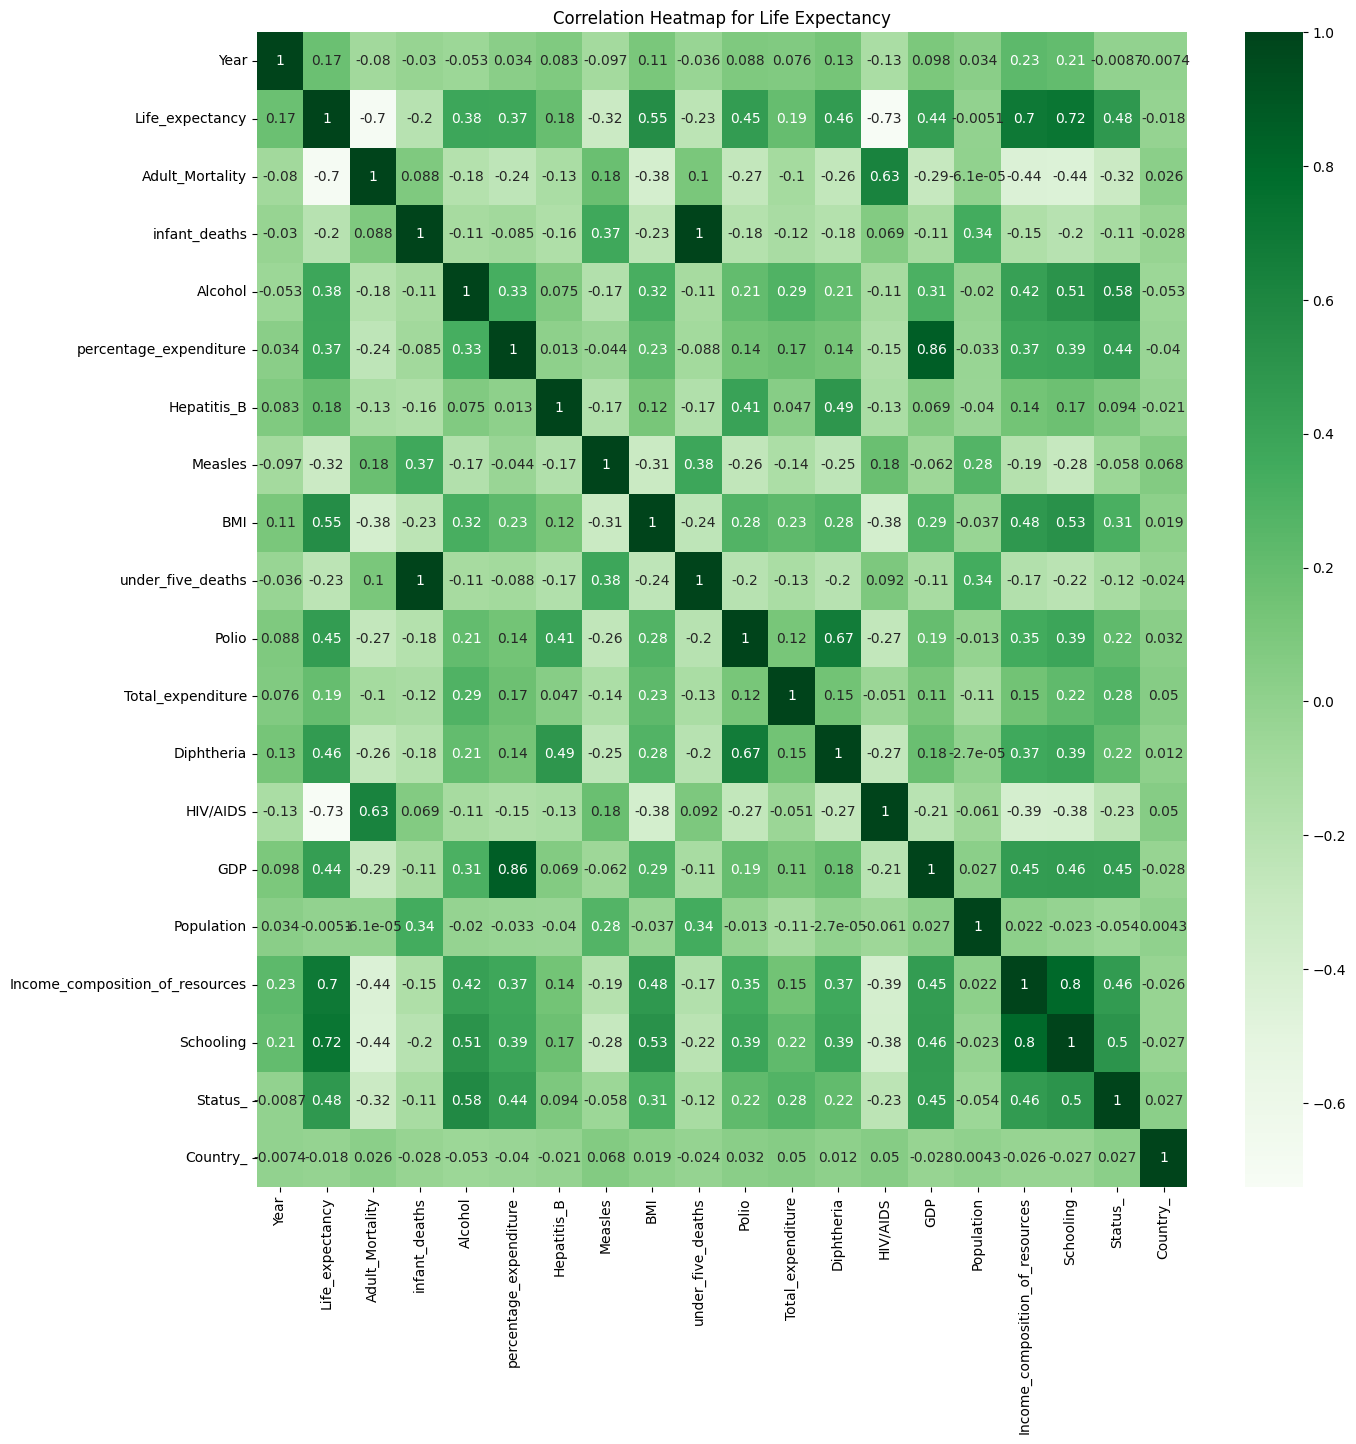

In [84]:
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='Greens',annot=True)
plt.title('Correlation Heatmap for Life Expectancy')
plt.show()

In [85]:
#taking an average of under_5 and infant_deaths
df['dying_children'] = (df.under_five_deaths + df.infant_deaths)/2
df['Gross'] = (df.GDP + df.percentage_expenditure)/2

In [86]:
df.drop(['under_five_deaths','infant_deaths'],axis=1,inplace=True)
df.drop(['GDP','percentage_expenditure'],axis=1,inplace=True)

In [87]:
#treating skewness for merged columns
df.dying_children = np.sqrt(df.dying_children)
df.dying_children.skew()
df.Gross = np.sqrt(df.Gross)
df.Gross.skew()

1.5985667858407842

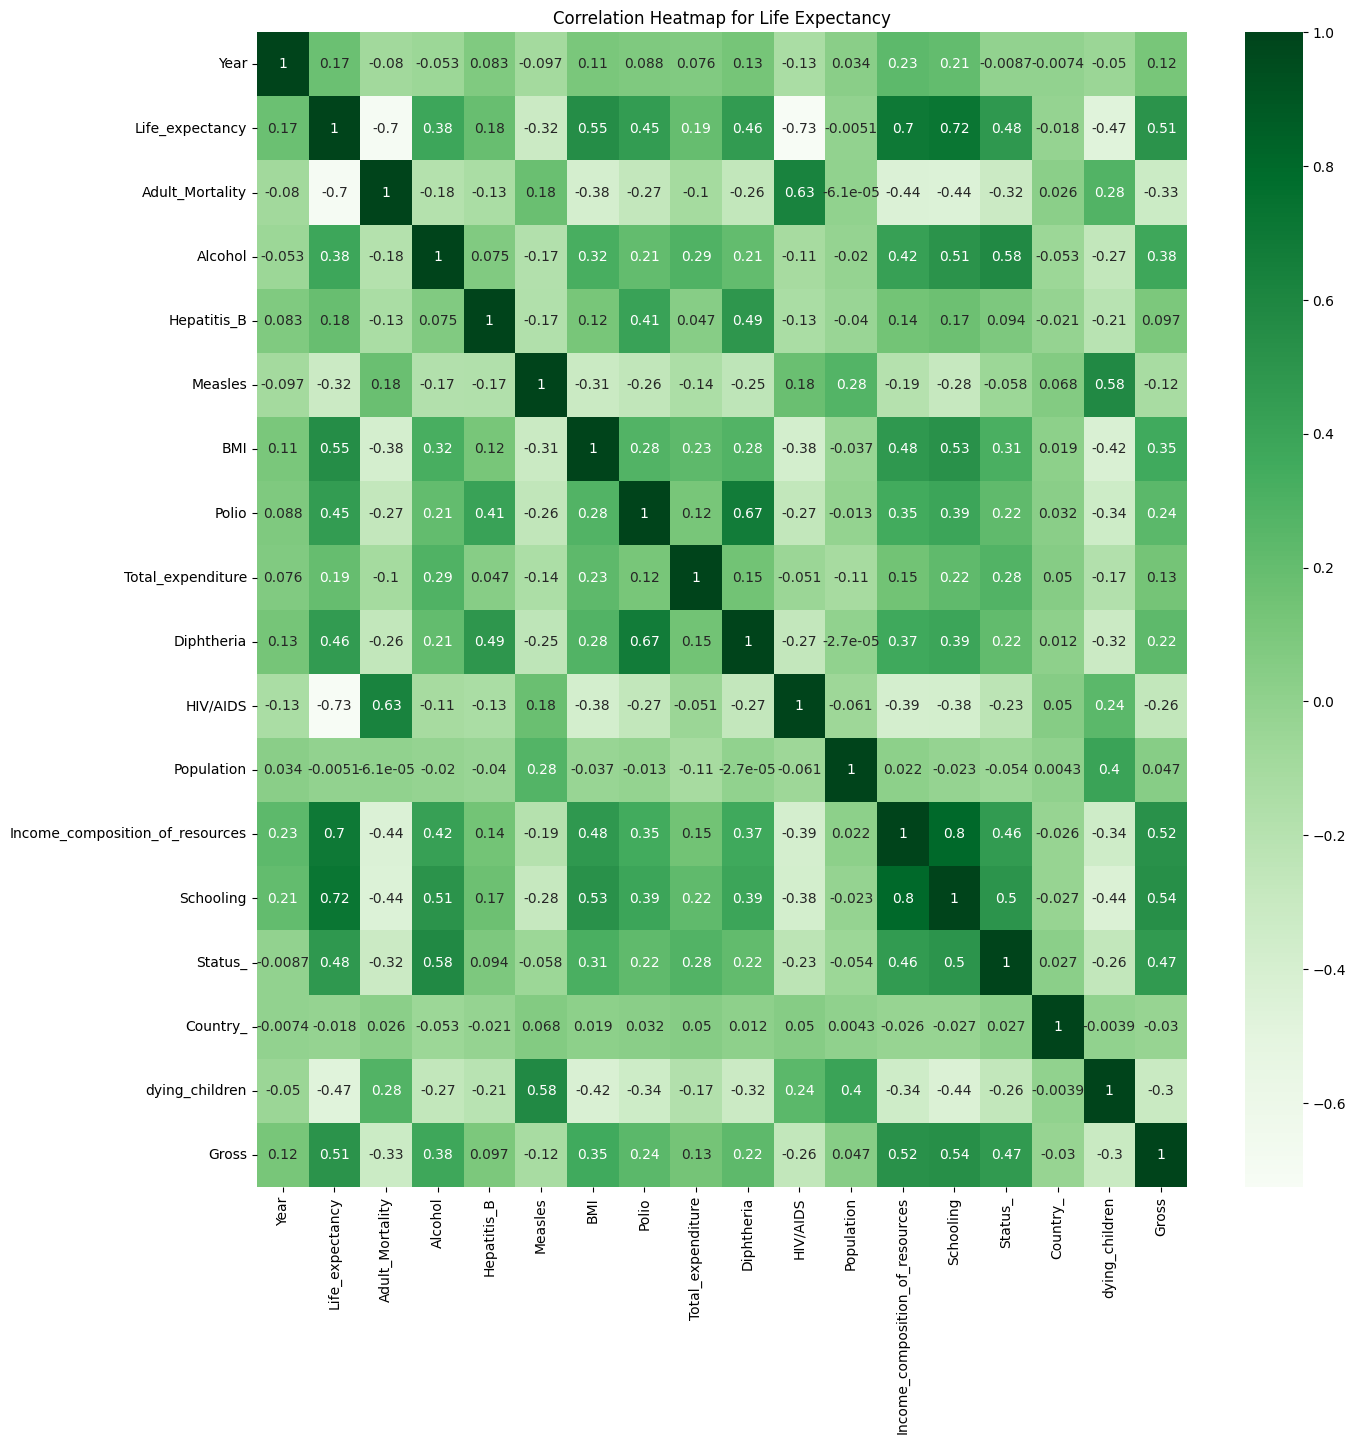

In [88]:
#calcualting the correlation for the data
corr = df.corr()

#configuring map size
plt.figure(figsize=(15,15))
#plotting a heatmap to visualize correlation coefficient and relationship
sb.heatmap(corr, cmap='Greens',annot=True)
plt.title('Correlation Heatmap for Life Expectancy')
plt.show()

#### Doing a Train-Test split

In [90]:
x = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
x_train.shape

(1880, 17)

In [93]:
x_test.shape

(470, 17)

#### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [96]:
#fitting the model with the train data
lr.fit(x_train,y_train)

LinearRegression()

In [97]:
lr.intercept_,lr.coef_

(19.39053008863082,
 array([ 1.95978099e-02, -1.57354584e-02,  3.25190781e-02, -1.88180999e-02,
        -1.15268607e-01,  1.45725539e-02,  1.54321984e-02,  6.33059669e-02,
         3.69533103e-02, -3.31756377e+00,  1.28519446e-04,  6.75314211e+00,
         5.76233422e-01,  1.73599366e+00,  4.64884743e-03, -2.01949051e-01,
         1.63693533e-02]))

In [98]:
#making a prediction on train data
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [99]:
from sklearn.metrics import r2_score
r2score = r2_score(y_train,y_pred_train)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.8442279511025443
Test Accuracy: 0.838389961240894


In [100]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_pred_train)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 14.456638521635826
MSE Test Accuracy: 14.02702784295073


#### Doing a Lasso and Ridge

In [102]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [103]:
#making predictions
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [104]:
r2score = r2_score(y_train,y_pred_train_lasso)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_lasso)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.8365120730261916
Test Accuracy: 0.8312201932407178


In [105]:
#mse
mse = mean_squared_error(y_train,y_pred_train_lasso)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_lasso)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 15.172721163010575
MSE Test Accuracy: 14.64933160661654


In [106]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [107]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [108]:
r2score = r2_score(y_train,y_pred_train_ridge)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_ridge)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.8442278452881634
Test Accuracy: 0.8383918894171045


In [109]:
#mse
mse = mean_squared_error(y_train,y_pred_train_ridge)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_ridge)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 14.456648341884488
MSE Test Accuracy: 14.026860485888031


#### Doing an ElasticNet

In [111]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1,l1_ratio=0.5)
en.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [112]:
y_pred_train_en = en.predict(x_train)
y_pred_test_en = en.predict(x_test)

In [113]:
r2score = r2_score(y_train,y_pred_train_en)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_en)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.8374908024954909
Test Accuracy: 0.8325460071416064


In [114]:
#mse
mse = mean_squared_error(y_train,y_pred_train_en)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_en)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 15.081888833024038
MSE Test Accuracy: 14.534256895632426


#### Doing a Decision Tree

In [116]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=150)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=150)

In [117]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [118]:
r2score=r2_score(y_pred_train_dt,y_train)
print(f'Train Accuracy: {r2score}')

r2scoree=r2_score(y_pred_test_dt,y_test)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 1.0
Test Accuracy: 0.9093401196912756


In [119]:
#mse
mse = mean_squared_error(y_train,y_pred_train_dt)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_dt)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 0.0
MSE Test Accuracy: 8.143255319148937


### Trying out Ensemble Techniques

#### Random Forest

In [326]:
from sklearn.ensemble import RandomForestRegressor as rf
rf = rf(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [327]:
# #getting the oob_score
# oob_score = rf.oob_score_
# print(f'OOB score: {oob_score}')

In [330]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [332]:
r2score=r2_score(y_pred_train_rf,y_train)
print(f'Train Accuracy: {r2score}')

r2scoree=r2_score(y_pred_test_rf,y_test)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.9927318685627257
Test Accuracy: 0.9612393181800478


In [334]:
#mse
mse = mean_squared_error(y_train,y_pred_train_rf)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_rf)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 0.6488920579787232
MSE Test Accuracy: 3.2462666468085124


#### Bagging

In [128]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagg = BaggingRegressor()
bagg.fit(x_train,y_train)

BaggingRegressor()

In [129]:
#making predictions
y_pred_train_bagg = bagg.predict(x_train)
y_pred_test_bagg = bagg.predict(x_test)

In [130]:
r2score = r2_score(y_train,y_pred_train_bagg)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_bagg)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.988698933607347
Test Accuracy: 0.9516342540993763


In [131]:
#mse
mse = mean_squared_error(y_train,y_pred_train_bagg)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_bagg)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 1.0488109574468083
MSE Test Accuracy: 4.197930212765958


In [132]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=20)
bag = BaggingRegressor(estimator=base_estimator,n_estimators=100)
bag.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=100)

In [133]:
#making predictions
y_pred_train_bag = bag.predict(x_train)
y_pred_test_bag = bag.predict(x_test)

In [134]:
r2score = r2_score(y_train,y_pred_train_bag)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_bag)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.9929984792505279
Test Accuracy: 0.9621496847340223


In [135]:
#mse
mse = mean_squared_error(y_train,y_pred_train_bag)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_bag)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 0.6497857304520912
MSE Test Accuracy: 3.2852379108189327


#### Gradient Boosting

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=5000,learning_rate=0.5,random_state=100)
gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=5000,
                          random_state=100)

In [138]:
y_pred_train_gb = gb.predict(x_train)
y_pred_test_gb = gb.predict(x_test)

In [139]:
r2score = r2_score(y_train,y_pred_train_gb)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_gb)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.9999999999999999
Test Accuracy: 0.9410101595679767


In [140]:
#mse
mse = mean_squared_error(y_train,y_pred_train_gb)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_gb)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 6.813980520465866e-15
MSE Test Accuracy: 5.1200540544675075


#### ADA Boosting

In [142]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100)

In [143]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [144]:
r2score = r2_score(y_train,y_pred_train_ada)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_ada)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.909125104804829
Test Accuracy: 0.9048547019602178


In [145]:
#mse
mse = mean_squared_error(y_train,y_pred_train_ada)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_ada)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 8.433769214867052
MSE Test Accuracy: 8.258185908359438


#### XG Boost

In [147]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000,max_depth=200)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=200, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [148]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [149]:
r2score = r2_score(y_train,y_pred_train_xgb)
print(f'Train Accuracy: {r2score}')

r2scoree = r2_score(y_test,y_pred_test_xgb)
print(f'Test Accuracy: {r2scoree}')

Train Accuracy: 0.9999999971543753
Test Accuracy: 0.9509177138988285


In [150]:
#mse
mse = mean_squared_error(y_train,y_pred_train_xgb)
print(f'MSE Train Accuracy: {mse}')

mse2 = mean_squared_error(y_test,y_pred_test_xgb)
print(f'MSE Test Accuracy: {mse2}')

MSE Train Accuracy: 2.6409209958523716e-07
MSE Test Accuracy: 4.260122694253198


### Trying a feature selection using coefficients to determine important features


In [152]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x,y)

In [153]:
# lr.intercept_,lr.coef_

In [154]:
# selected_features = 

### HYPERPARAMETER TUNING FOR EACH REGRESSION MODEL

In [364]:
#Tuning for Random Forest
#checking the parameters of a random forest for the best one to use for a good accuracy
#cv is cross validation (doing a k-fold validation where
#split = 5: training the model with k1 fold and validating with the other fold)
#n_jobs is number of jobs to run in parallel duringthe grid search. default is None(no parallelization)
#-1 uses all available processors for parallel execution
#verbose determines the amount of information displayed during the grid search
#takes 0(silent) through 3 (very detailed - useful for debugging)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
# best_accuracy = grid_search.best_accuracy_
best_estimator = grid_search.best_estimator_

print(f'Best Parameter: {best_params}')
# print(f'Best Accuracy: {best_accuracy}')
print(f'Best Estimator: {best_estimator}')

Best Parameter: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Estimator: RandomForestRegressor(n_estimators=150)


In [157]:
# #get the  best estimator so i can make predictions
# best_model = grid_search.best_estimator_
# print(f'Best Model: {best_model}')

In [158]:
# y_pred_train_rf1 = best_model.predict(x_train)
# y_pred_test_rf1 = best_model.predict(x_test)

In [159]:
# mse = mean_squared_error(y_pred_train_rf1,y_train)
# print(f'MSE Train Accuracy: {mse}')
# mse2 = mean_squared_error(y_pred_test_rf1,y_test)
# print(f'MSE Test Accuracy: {mse2}')

In [160]:
#trying out cross-validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and compute R-squared scores
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='')
print(f"Average R-squared: {scores.mean()}")

Average R-squared: 0.9447032886148786


In [161]:
df.head()

,Year,Life_expectancy,Adult_Mortality,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population,Income_composition_of_resources,Schooling,Status_,Country_,dying_children,Gross
0,2013,59.9,268.0,0.01,64.0,6.066108,18.1,62.0,8.13,64.0,0.316228,5633.088673,0.470,9.9,0.0,0,8.803408,18.774507
1,2000,54.8,321.0,0.01,62.0,8.784622,12.2,24.0,8.20,24.0,0.316228,541.992620,0.338,5.5,0.0,0,10.246951,7.905219
2,2006,57.3,295.0,0.03,64.0,7.596392,14.7,58.0,7.43,58.0,0.316228,1609.144182,0.405,8.1,0.0,0,10.000000,12.036098
3,2010,58.8,279.0,0.01,66.0,7.595890,16.7,66.0,9.20,66.0,0.316228,1697.989105,0.448,9.2,0.0,0,9.380832,17.790564
4,2005,57.3,291.0,0.02,66.0,7.167809,14.2,58.0,8.70,58.0,0.316228,507.738121,0.396,7.9,0.0,0,10.074721,3.652587


#### Doing a Standardization to scale mean to 0 and std to 1

In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fitting scaler on training data
scaler.fit(x_train)
#transformimg training data
x_trained_scaled = scaler.transform(x_train)
#transforming the test data
x_test_scaled = scaler.transform(x_test)

In [344]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(x_trained_scaled,y_train)

RandomForestRegressor(n_estimators=150)

In [346]:
ypredtrain = rf.predict(x_trained_scaled)
ypredtest = rf.predict(x_test_scaled)

In [348]:
from sklearn.metrics import r2_score, mean_squared_error

r2score = r2_score(ypredtrain,y_train)
print(f'R2 Train accuracy: {r2score}')
r2scoree = r2_score(ypredtest,y_test)
print(f'R2 Train accuracy: {r2scoree}')

mse = mean_squared_error(ypredtrain,y_train)
print(f'MSE Train accuracy: {mse}')
mse2 = mean_squared_error(ypredtest,y_test)
print(f'MSE Test accuracy: {mse2}')

R2 Train accuracy: 0.9925160169181622
R2 Train accuracy: 0.9611323382632312
MSE Train accuracy: 0.6680669817966884
MSE Test accuracy: 3.248441670921991


In [167]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population,Income_composition_of_resources,Schooling,Status_,Country_,dying_children,Gross
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,2007.537447,69.275404,165.828763,4.593271,81.153300,3.322416,38.559078,82.708389,5.936185,82.383606,0.834707,2376.339380,0.631084,12.055332,0.176596,95.365532,3.405382,48.366204
std,4.611986,9.573065,125.053940,3.896770,22.342639,3.240147,19.953953,23.245213,2.408747,23.699651,1.044410,2301.361727,0.201702,3.163790,0.381407,55.753254,4.774626,40.235963
min,2000.000000,36.300000,2.000000,0.010000,6.000000,0.000000,2.300000,6.000000,0.650000,4.800000,0.316228,18.944947,0.000000,2.900000,0.000000,0.000000,0.000000,0.943722
25%,2004.000000,63.300000,74.000000,1.100000,81.141811,0.000000,19.600000,78.000000,4.372500,78.000000,0.316228,628.454281,0.509000,10.300000,0.000000,47.000000,0.000000,17.665349
50%,2008.000000,72.200000,144.000000,4.160000,87.000000,2.833213,43.500000,93.000000,5.936185,93.000000,0.316228,1935.680757,0.668000,12.200000,0.000000,94.000000,1.870829,40.727898
75%,2012.000000,75.700000,227.000000,7.327500,96.000000,5.878429,56.100000,97.000000,7.340000,97.000000,0.894427,3452.903659,0.773000,14.200000,0.000000,145.000000,4.795832,60.764395
max,2015.000000,89.000000,723.000000,17.310000,99.000000,11.968066,87.300000,99.000000,17.240000,99.000000,7.113368,20760.932488,0.948000,20.700000,1.000000,190.000000,45.051970,201.787243


In [168]:
# df.Measles = np.log(1+df.Measles)
# df.Measles.skew()
# df.Population = np.sqrt(df.Population)
# df.Population.skew()
# df.dying_children = np.sqrt(df.dying_children)
# df.dying_children.skew()
# df.Gross = np.sqrt(df.Gross)
# df.Gross.skew()

In [358]:
# df.iloc[df.Alcohol > 45, 'Alcohol']
df[df.Alcohol>12]

,Year,Life_expectancy,Adult_Mortality,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population,Income_composition_of_resources,Schooling,Status_,Country_,dying_children,Gross
94,2010,84.0,75.0,12.10,86.000000,3.970292,55.2,86.0,11.17,86.0,0.316228,914.518453,0.872000,15.40000,1.0,8,0.000000,164.439742
96,2001,78.6,92.0,12.40,44.000000,0.000000,5.6,83.0,1.12,84.0,0.316228,917.765221,0.837000,15.50000,1.0,8,0.000000,118.474858
97,2012,88.0,7.0,12.26,92.000000,3.610918,56.1,92.0,11.17,92.0,0.316228,2903.444678,0.884000,15.70000,1.0,8,0.000000,167.648360
103,2003,78.8,88.0,12.20,83.000000,4.510860,51.7,84.0,1.48,84.0,0.316228,2849.811046,0.837000,14.70000,1.0,8,0.000000,43.112448
104,2007,81.0,8.0,12.50,85.000000,3.044522,53.7,85.0,1.40,85.0,0.316228,2880.188709,0.860000,15.20000,1.0,8,0.000000,164.378400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2007,73.9,151.0,12.68,99.000000,0.000000,41.3,99.0,6.81,99.0,0.316228,3452.903659,0.707000,12.80000,0.0,143,0.000000,60.764395
1942,2003,79.4,83.0,12.09,81.000000,5.549076,59.3,99.0,7.99,98.0,0.316228,6495.201690,0.830000,15.60000,1.0,159,1.414214,111.132340
1948,2002,79.5,83.0,12.26,82.000000,4.219508,58.8,98.0,7.25,98.0,0.316228,6436.735042,0.828000,15.70000,1.0,159,1.414214,31.208090
2205,2005,79.0,82.0,12.05,81.141811,4.382027,6.7,91.0,8.24,91.0,0.316228,3452.903659,0.631084,12.02814,1.0,180,2.000000,60.764395
